In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets as skdatasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from numpy.testing import assert_array_equal
import matplotlib.pyplot as plt
from data_utils import load_dataset, plot_digit
from pdb import set_trace

In [2]:
def save_dataset(x_train, x_valid, x_test, y_train, y_valid, y_test, filename):
    assert x_train.shape[1] == x_valid.shape[1] == x_test.shape[1]
    assert y_train.shape[1] == y_valid.shape[1] == y_test.shape[1]
    assert x_train.shape[0] == y_train.shape[0]
    assert x_valid.shape[0] == y_valid.shape[0]
    assert x_test.shape[0] == y_test.shape[0]
    print("d = %d" % x_train.shape[1])
    print("n_train = %d" % x_train.shape[0])
    print("n_valid = %d" % x_valid.shape[0])
    print("n_test = %d" % x_test.shape[0])
    np.savez(filename, x_train=x_train, x_valid=x_valid, x_test=x_test, y_train=y_train, y_valid=y_valid, y_test=y_test)

def verify_dataset(original, reloaded):
    """ make sure that reloaded data is the same as original """
    for arr_original, arr_reloaded in zip(original, reloaded):
        assert_array_equal(arr_original, arr_reloaded)

# Pumadyn32nm

In [3]:
def process_pumadyn32nm():
    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    data = np.loadtxt('pumadyn32nm.data')
    x = data[:, :32]
    y = data[:, -1]
    x = x_scaler.fit_transform(x)
    y = y_scaler.fit_transform(y.reshape((-1,1)))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5, 
                                                        shuffle=True)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2/0.9, random_state=5, 
                                                          shuffle=True)
    save_dataset(x_train, x_valid, x_test, y_train, y_valid, y_test, filename='pumadyn32nm.npz')
    verify_dataset(original=(x_train, x_valid, x_test, y_train, y_valid, y_test),
                   reloaded=load_dataset('pumadyn32nm'))
process_pumadyn32nm()

d = 32
n_train = 5733
n_valid = 1639
n_test = 820


# Iris

In [4]:
def process_iris():
    x_scaler = StandardScaler()
    encoder = OneHotEncoder(sparse=False, categories='auto', dtype=bool)
    iris = skdatasets.load_iris()
    x = iris.data
    y = iris.target.reshape((-1,1))
    x = x_scaler.fit_transform(x)
    y = encoder.fit_transform(y)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5, 
                                                        shuffle=True, stratify=encoder.inverse_transform(y))
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2/0.9, random_state=5, 
                                                          shuffle=True, stratify=encoder.inverse_transform(y_train))
    save_dataset(x_train, x_valid, x_test, y_train, y_valid, y_test, filename='iris.npz')
    verify_dataset(original=(x_train, x_valid, x_test, y_train, y_valid, y_test),
                   reloaded=load_dataset('iris'))
process_iris()

d = 4
n_train = 104
n_valid = 31
n_test = 15


# Boston

In [5]:
def process_boston():
    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    x, y = skdatasets.load_boston(return_X_y=True)
    x = x_scaler.fit_transform(x)
    y = y_scaler.fit_transform(y.reshape((-1,1)))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5, 
                                                        shuffle=True)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2/0.9, random_state=5, 
                                                          shuffle=True)
    save_dataset(x_train, x_valid, x_test, y_train, y_valid, y_test, filename='boston.npz')
    verify_dataset(original=(x_train, x_valid, x_test, y_train, y_valid, y_test),
                   reloaded=load_dataset('boston'))
process_boston()

d = 13
n_train = 353
n_valid = 102
n_test = 51


# Mauna Loa

d = 1
n_train = 511
n_valid = 145
n_test = 73


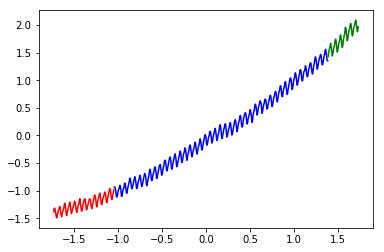

In [6]:
def process_mauna_loa():
    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    data = np.loadtxt('mauna_loa_raw.csv', skiprows=72)
    x = data[:,(2,)]
    y = data[:,(-3,)]
    x = x_scaler.fit_transform(x)
    y = y_scaler.fit_transform(y)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5, 
                                                        shuffle=False)
    x_valid, x_train, y_valid, y_train = train_test_split(x_train, y_train, test_size=1.-0.2/0.9, random_state=5, 
                                                          shuffle=False)
    save_dataset(x_train, x_valid, x_test, y_train, y_valid, y_test, filename='mauna_loa.npz')
    verify_dataset(original=(x_train, x_valid, x_test, y_train, y_valid, y_test),
                   reloaded=load_dataset('mauna_loa'))
    
    # plot the data
    plt.plot(x_train, y_train, 'b')
    plt.plot(x_valid, y_valid, 'r')
    plt.plot(x_test, y_test, 'g')
process_mauna_loa()

# Rosenbrock

In [7]:
def process_rosenbrock():
    orig100 = load_dataset('rosenbrock', n_train=100, d=2)
    new100 = load_dataset('rosenbrock', n_train=100, d=2)
    verify_dataset(orig100, new100) # make sure reproducable with same train points
    new1000 = load_dataset('rosenbrock', n_train=1000, d=2)
    verify_dataset(orig100[1:2], new1000[1:2]) # make sure train/valid splits don't change
process_rosenbrock()

# MNIST small

d = 28
n_train = 10000
n_valid = 1000
n_test = 1000
[ 987 1124  993 1022  974  904  986 1044  975  991]
[ 99 112  99 102  97  90  99 105  98  99]
[ 98 114 103 101  98  89  96 103  97 101]
digit #2:


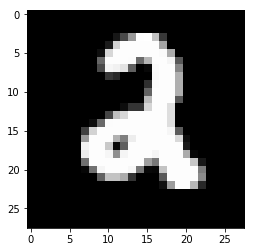

In [8]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

def process_mnist_small():
    (x_train, y_train),(x_test, y_test) = mnist.load_data() # download the data

    encoder = OneHotEncoder(sparse=False, categories='auto', dtype=bool)
    # one-hot encode the responses
    y_train = encoder.fit_transform(y_train.reshape((-1,1)))
    y_test  = encoder.transform(y_test.reshape((-1,1)))
    # get the validation set and reduce size of training set
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=1000, train_size=10000, 
                                            random_state=5, shuffle=True, stratify=encoder.inverse_transform(y_train))
    # reduce the size of the testing set
    _, x_test, _, y_test = train_test_split(x_test, y_test, train_size=9000, test_size=1000, random_state=5, 
                                            shuffle=True, stratify=encoder.inverse_transform(y_test))
    # save the dataset and verify
    save_dataset(x_train, x_valid, x_test, y_train, y_valid, y_test, filename='mnist_small.npz')
    (x_train, x_valid, x_test, y_train, y_valid, y_test) = load_dataset('mnist_small')
    # print the class counts in each split
    print(y_train.sum(axis=0))
    print(y_valid.sum(axis=0))
    print(y_test.sum(axis=0))
    # plot a digit
    plot_digit(x_train[4])
    print('digit #%d:' % np.where(y_train[4])[0][0])
process_mnist_small()